# WeatherPy

-----------

## Observations
###The weather becomes warmer as you approach the equator (0 Deg. Latitude) as displayed in Latitude vs Max Temp plot  
###As the linear regression visualizes, in the nothern hemisphere, as you move away from the equator the temperature decreases ###As the linear regression visualizes, in the southern hemisphere, as you get closer to the equator the temperature increases
###Between 0 and 40 degrees latitude there are no cities with a max temp below 60 degrees (F)
###Windspeed generally is betweeen 0 and 15 mph in all latitudes
###As the linear regression visualizes, there isn't a strong relationship between latitude and humidity

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
#pipinstall citypy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [54]:
# List for holding lat_lngs and cities
cities_country = []
latitudes = []
longitudes = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    cityname = city.city_name
    countryname = city.country_code
    city_with_country = tuple([cityname, countryname.upper()])
    if city_with_country not in cities_country:
        cities_country.append(city_with_country)
        cities.append(city_with_country[0])
        countries.append(city_with_country[1])
        latitudes.append(lat_lng[0])
        longitudes.append(lat_lng[1])
        
# Print the city count to confirm sufficient count of 500+ 
totalcities = len(cities_country)
print(f"Total cities are: {totalcities}")

Total cities are: 639


In [55]:
# get the data into pandas dataframe
dict = {"City": cities, "Country": countries, "Latitude":latitudes, "Longitudes": longitudes}
city_data = pd.DataFrame(dict)
city_data.head()

,City,Country,Latitude,Longitudes
0,pasni,PK,25.469847,63.191387
1,wagar,SD,15.955655,35.918641
2,vaini,TO,-67.686796,-170.560995
3,saskylakh,RU,73.091029,114.198713
4,punta arenas,CL,-59.169639,-110.720388


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [56]:
# OpenWeatherMap API Key
settings = {"appid": weather_api_key}

# OpenWeatherMap API Key
weather_api_key = "1453be9086f2afdefafaffd83b66b68e"

In [57]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [58]:
# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Pasni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=pasni
Processing Record 2 | Wagar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=wagar
Processing Record 3 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=vaini
Processing Record 4 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=saskylakh
Processing Record 5 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=punta arenas
Processing Record 6 | Teacapan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=teacapan
Processing Record 7 | Thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 57 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=jamestown
Processing Record 58 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=barrow
Processing Record 59 | San Jose
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=san jose
Processing Record 60 | Prado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=prado
Processing Record 61 | Kochubey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=kochubey
Processing Record 62 | Poya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=poya
Processing Record 63 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=bluff
Processing Rec

Processing Record 113 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=geraldton
Processing Record 114 | Richards Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=richards bay
Processing Record 115 | Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=clyde river
Processing Record 116 | Atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=atar
Processing Record 117 | Iquique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=iquique
Processing Record 118 | Menomonie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=menomonie
Processing Record 119 | Nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83

Processing Record 169 | Labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=labuhan
Processing Record 170 | Harsūd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=harsud
Processing Record 171 | Mahon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=mao
Processing Record 172 | Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=lincoln
Processing Record 173 | Loandjili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=loandjili
Processing Record 174 | Gazli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=gazli
Processing Record 175 | Watsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=watsa
Processing 

Processing Record 226 | Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=isangel
Processing Record 227 | Asău
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=asau
Processing Record 228 | Krasnoarmeysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=krasnoarmeysk
Processing Record 229 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=bathsheba
Processing Record 230 | Shingū
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=shingu
Processing Record 231 | Matamoros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=matamoros
Processing Record 232 | Dondo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e

Processing Record 282 | Gornopravdinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=gornopravdinsk
City not found. Skipping...
Processing Record 283 | Luby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=luby
Processing Record 284 | Fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=fairbanks
Processing Record 285 | Lüderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=luderitz
Processing Record 286 | Samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=samarai
Processing Record 287 | Maromitsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=maromitsa
Processing Record 288 | Lagos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 337 | Krasnoslobodsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=krasnoslobodsk
Processing Record 338 | Rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=rawson
City not found. Skipping...
Processing Record 339 | Örnsköldsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=ornskoldsvik
Processing Record 340 | Taubaté
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=taubate
Processing Record 341 | Hong Kong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=victoria
City not found. Skipping...
Processing Record 342 | Pearland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=pearland
Processing Record 343 | Ashland
http://api.openweathermap.o

Processing Record 393 | Carbonia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=carbonia
Processing Record 394 | Latung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=latung
Processing Record 395 | Palāsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=palasa
Processing Record 396 | Pudozh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=pudozh
Processing Record 397 | Wenling
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=wenling
Processing Record 398 | Hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=hambantota
Processing Record 399 | Jammalamadugu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q

Processing Record 449 | Loncoche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=loncoche
Processing Record 450 | Taree
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=taree
Processing Record 451 | Malé
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=male
Processing Record 452 | Port Blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=port blair
Processing Record 453 | Flin Flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=flin flon
Processing Record 454 | Valparaíso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=valparaiso
Processing Record 455 | Kawhia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=

Processing Record 505 | Pio XII
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=pio xii
Processing Record 506 | Kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=kirakira
Processing Record 507 | Masvingo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=masvingo
City not found. Skipping...
Processing Record 508 | Oriximiná
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=oriximina
Processing Record 509 | Tangi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=tangi
Processing Record 510 | Harar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=harer
Processing Record 511 | Ami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefa

Processing Record 561 | Harindānga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=harindanga
Processing Record 562 | Camaná
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=camana
Processing Record 563 | Bianzhuang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=bianzhuang
Processing Record 564 | Vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=vestmannaeyjar
Processing Record 565 | Sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=sisimiut
City not found. Skipping...
Processing Record 566 | Constitución
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1453be9086f2afdefafaffd83b66b68e&q=constitucion
Processing Record 567 | Tarakan
http://api.openweathermap.org/data/2.5/weather

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
# Create empty lists to append the API data into lists 
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values to check for any null values 
weather_data.count()

City          591
Cloudiness    591
Country       591
Date          591
Humidity      591
Lat           591
Lng           591
Max Temp      591
Wind Speed    591
dtype: int64

In [60]:
# drop all the rows in which any of the column contains null value.
weather_data = weather_data.dropna(how="any")

In [61]:
# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pasni,54,PK,1595204454,84,25.26,63.47,84.92,10.00
1,Wagar,100,SD,1595204456,55,16.15,36.20,83.39,21.74
2,Vaini,90,TO,1595204458,88,-21.20,-175.20,71.60,8.05
3,Saskylakh,31,RU,1595204408,62,71.92,114.08,59.50,10.65
4,Punta Arenas,63,CL,1595204461,74,-53.15,-70.92,33.80,8.05


In [62]:
# save the data to csv file
weather_data.to_csv("cities.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

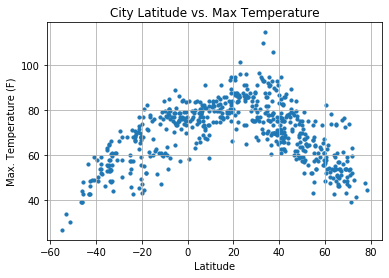

In [63]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

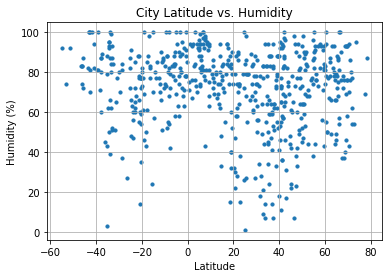

In [64]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

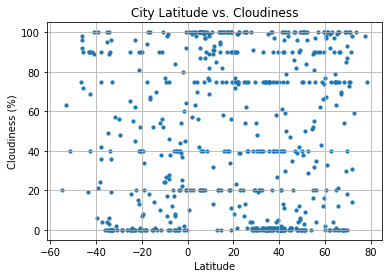

In [65]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

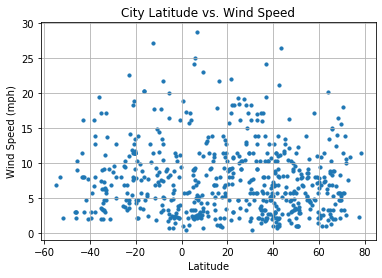

In [66]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [67]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) > 0, :]
southern_df = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.42x + 88.08
The r-squared is: -0.6404882931566565
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


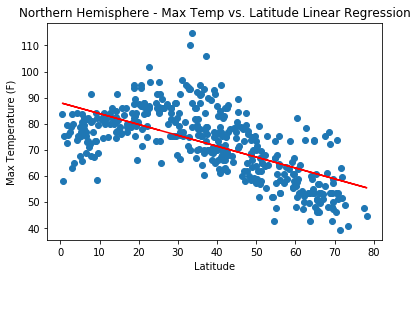

In [68]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.savefig("LinearReg_Temp_vs_Lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.72x + 78.7
The r-squared is: 0.770910689370466
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


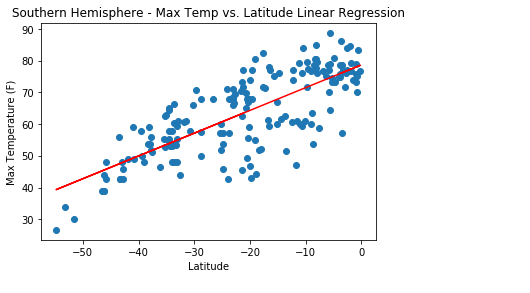

In [69]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.savefig("SH_LinearReg_Temp_vs_Lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.08x + 73.21
The r-squared is: -0.0755601424628122
The regression does not display much of a correlation between the data sets.


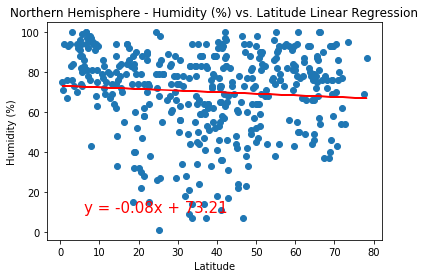

In [70]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.savefig("NH_LinearReg_Humdty_vs_Lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.0x + 75.06
The r-squared is: 0.0027232602159933217
The regression does not display much of a correlation between the data sets.


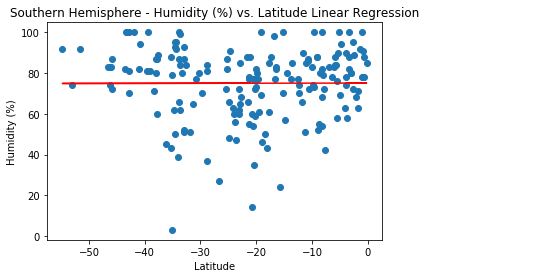

In [71]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("SH_LinearReg_Humdty_vs_Lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.24x + 60.9
The r-squared is: -0.12090614870091274
The regression does not display much of a correlation between the data sets.


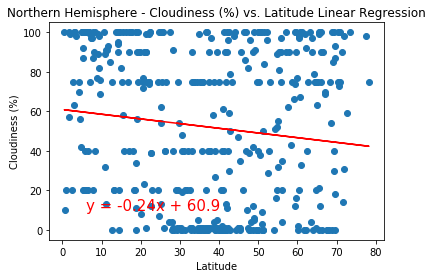

In [72]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("NH_LinearReg_Cloud_vs_Lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.45x + 28.58
The r-squared is: -0.17616318928638777
The regression does not display much of a correlation between the data sets.


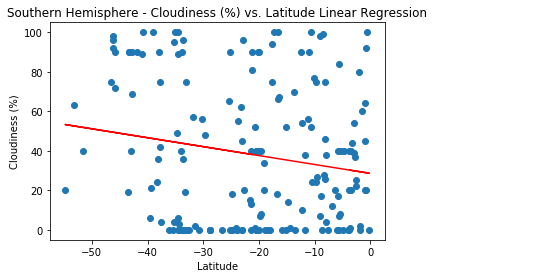

In [73]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("SH_LinearReg_Cloud_vs_Lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.02x + 8.47
The r-squared is: -0.09404303175530133
The regression does not display much of a correlation between the data sets.


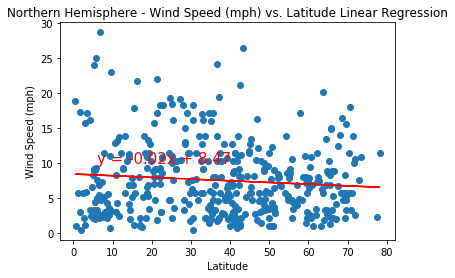

In [74]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("NH_LinearReg_WindSpeed_vs_Lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 8.33
The r-squared is: 0.04123803634111837
The regression does not display much of a correlation between the data sets.


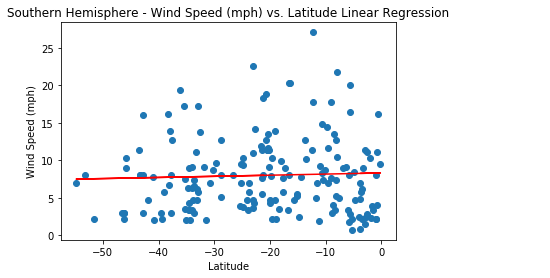

In [75]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("SH_LinearReg_WindSpeed_vs_Lat.png")
plt.show()